In [1]:
import requests, csv
from bs4 import BeautifulSoup
from os import path, listdir
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

import scripts.scraper as scraper
import scripts.data_preparation as data_preparation

# Scraping

In [3]:
# scraper.scrape_urls()

# Data exploration

In [32]:
df = data_preparation.make_dataframe()

3 files founded
Total of reviews : 67


In [31]:
df

,product,title,rating,text,preprocessed_title,preprocessed_text
0,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Trop bien,5,Je l ai reçu aujourd'hui et je m amuse comme u...,"[trop, bien]","[reçu, aujourdhui, amuse, comme, folle, grand,..."
1,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Top (je confirme stabilisateur sur objectif),5,Parfait pour la livraison toujours au top !Pou...,"[top, confirme, stabilisateur, objectif]","[parfait, livraison, toujours, top, commande, ..."
2,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Parfait pour un débutant,5,Très bon appareil photo.Je recommande.,"[parfait, débutant]","[très, bon, appareil, photoje, recommande]"
3,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Bien content,5,Très content du produit.Revu ce jour plusieurs...,"[bien, content]","[très, content, produitrevu, jour, plusieurs, ..."
4,Braun Series 7 Rasoir Électrique Homme À Grill...,"Très déçu, surtout pour le prix!! par rapport ...",3,"J'ai acheté ce rasoir pour mon fils, je dispos...","[très, déçu, surtout, prix, rapport, modèle, d...","[jai, acheté, rasoir, fils, dispose, déjà, dun..."
...,...,...,...,...,...,...
63,"Kindle, maintenant avec un éclairage frontal i...",Version 8GO,5,J'ai eu la surprise de recevoir un modèle de 8...,"[version, go]","[jai, surprise, recevoir, modèle, go, alors, q..."
64,"Kindle, maintenant avec un éclairage frontal i...",Petite mais addictive,4,"J'ai récemment voulu changer de liseuse, car m...","[petite, addictive]","[jai, récemment, voulu, changer, liseuse, car,..."
65,"Kindle, maintenant avec un éclairage frontal i...",Bien pour l'éclairage mais pas le tactile,4,J'ai eu au moins trois générations de Kindle d...,"[bien, léclairage, tactile]","[jai, moins, trois, générations, kindle, diffé..."
66,"Kindle, maintenant avec un éclairage frontal i...",une batterie qui tient 10 heures de lecture,1,J'ai acheté cette kindle car je pensais que la...,"[batterie, tient, heures, lecture]","[jai, acheté, cette, kindle, car, pensais, bat..."


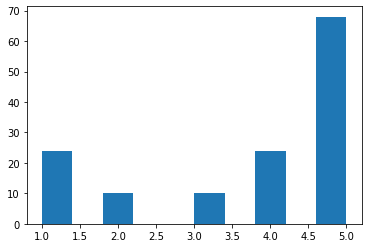

In [5]:
plt.hist(df['rating']);

# NLP

## Preprocessing

In [26]:
df.reset_index(drop=True)

,product,title,rating,text,preprocessed_title,preprocessed_text
0,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Trop bien,5,Je l ai reçu aujourd'hui et je m amuse comme u...,"[trop, bien]","[reçu, aujourdhui, amuse, comme, folle, grand,..."
1,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Top (je confirme stabilisateur sur objectif),5,Parfait pour la livraison toujours au top !Pou...,"[top, confirme, stabilisateur, objectif]","[parfait, livraison, toujours, top, commande, ..."
2,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Parfait pour un débutant,5,Très bon appareil photo.Je recommande.,"[parfait, débutant]","[très, bon, appareil, photoje, recommande]"
3,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Bien content,5,Très content du produit.Revu ce jour plusieurs...,"[bien, content]","[très, content, produitrevu, jour, plusieurs, ..."
4,Braun Series 7 Rasoir Électrique Homme À Grill...,"Très déçu, surtout pour le prix!! par rapport ...",3,"J'ai acheté ce rasoir pour mon fils, je dispos...","[très, déçu, surtout, prix, rapport, modèle, d...","[jai, acheté, rasoir, fils, dispose, déjà, dun..."
...,...,...,...,...,...,...
63,"Kindle, maintenant avec un éclairage frontal i...",Version 8GO,5,J'ai eu la surprise de recevoir un modèle de 8...,"[version, go]","[jai, surprise, recevoir, modèle, go, alors, q..."
64,"Kindle, maintenant avec un éclairage frontal i...",Petite mais addictive,4,"J'ai récemment voulu changer de liseuse, car m...","[petite, addictive]","[jai, récemment, voulu, changer, liseuse, car,..."
65,"Kindle, maintenant avec un éclairage frontal i...",Bien pour l'éclairage mais pas le tactile,4,J'ai eu au moins trois générations de Kindle d...,"[bien, léclairage, tactile]","[jai, moins, trois, générations, kindle, diffé..."
66,"Kindle, maintenant avec un éclairage frontal i...",une batterie qui tient 10 heures de lecture,1,J'ai acheté cette kindle car je pensais que la...,"[batterie, tient, heures, lecture]","[jai, acheté, cette, kindle, car, pensais, bat..."


In [7]:
import string
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [4]:
def rating_to_int(rating):
    if rating in [5., 4., 3., 2., 1.]:
        return int(rating)
    else:
        print('error')
        return rating

In [5]:
df['rating'] = df['rating'].apply(rating_to_int)

NameError: name 'df' is not defined

In [5]:
def preprocess(text):
    """returns preprocessed text"""
    
    # lowercase
    text = text.lower()
    
    # number
    text = ''.join(word for word in text if not word.isdigit())
    
    # punctuation
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '') 
    
    # stopwords
    stop_words = set(stopwords.words('french'))
    word_tokens = word_tokenize(text)
    text = [w for w in word_tokens if not w in stop_words]
    
    # tokenizing
    #stemmer = PorterStemmer()
    #stemmed = [stemmer.stem(word) for word in text]
    
    return text

In [8]:
df['preprocessed_title'] = df['title'].apply(preprocess)
df['preprocessed_text'] = df['text'].apply(preprocess)

In [9]:
df.head()

,product,title,rating,text,preprocessed_title,preprocessed_text
0,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Trop bien,5,Je l ai reçu aujourd'hui et je m amuse comme u...,"[trop, bien]","[reçu, aujourdhui, amuse, comme, folle, grand,..."
1,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Top (je confirme stabilisateur sur objectif),5,Parfait pour la livraison toujours au top !Pou...,"[top, confirme, stabilisateur, objectif]","[parfait, livraison, toujours, top, commande, ..."
2,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Parfait pour un débutant,5,Très bon appareil photo.Je recommande.,"[parfait, débutant]","[très, bon, appareil, photoje, recommande]"
3,EOS 2000D Kit 18-55mm is II Spiegelreflexkamera,Bien content,5,Très content du produit.Revu ce jour plusieurs...,"[bien, content]","[très, content, produitrevu, jour, plusieurs, ..."
0,Braun Series 7 Rasoir Électrique Homme À Grill...,"Très déçu, surtout pour le prix!! par rapport ...",3,"J'ai acheté ce rasoir pour mon fils, je dispos...","[très, déçu, surtout, prix, rapport, modèle, d...","[jai, acheté, rasoir, fils, dispose, déjà, dun..."
